In [ ]:
import pandas as pd
import numpy as np


In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
print(data.iloc[:,:-1])
X = data.iloc[:, :-1]
y = data['Outcome'].values.reshape(-1, 1)


     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [ ]:
import numpy as np
import pandas as pd

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=2000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        loss = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        m, n = X.shape

        # Инициализация весов и смещения
        self.weights = np.zeros((n, 1))
        self.bias = 0

        for iteration in range(self.num_iterations):
            # Вычисление гипотезы
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Вычисление градиентов
            dz = y_pred - y
            dw = (1/m) * np.dot(X.T, dz)
            db = (1/m) * np.sum(dz)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Вычисление функции потерь для мониторинга
            loss = self.compute_loss(y, y_pred)
            # if iteration % 100 == 0:
            #     print(f"Iteration {iteration}, Loss: {loss}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        predictions = [1 if i > 0.5 else 0 for i in y_pred]
        return predictions




In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from prettytable  import PrettyTable
from sklearn.model_selection import train_test_split

result = PrettyTable()
result.field_names = ["Feature_1","Feature_2", "Accuracy", "Precision", "Recall", "F1 Score"]

# Параметры для перебора
params = data.drop(['Outcome'], axis=1).columns.tolist()
params_pairs = []
for i in range(len(params)):
    for j in range(i + 1, len(params)):
        pair = (params[i], params[j])
        params_pairs.append(pair)


def choose_params():
   for pp in params_pairs:

    # Обучение модели
    X = data[[pp[0], pp[1]]].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(learning_rate=0.001, num_iterations=2000)
    model.fit(X_train,y_train)

    # Предсказания
    predictions = model.predict(X_test)

    # Оценка производительности
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    result.add_row([pp[0],pp[1],accuracy, precision, recall, f1])

choose_params()
print(result)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+--------------------------+--------------------------+--------------------+---------------------+---------------------+---------------------+
|        Feature_1         |        Feature_2         |      Accuracy      |      Precision      |        Recall       |       F1 Score      |
+--------------------------+--------------------------+--------------------+---------------------+---------------------+---------------------+
|       Pregnancies        |         Glucose          | 0.7727272727272727 |  0.717391304347826  |         0.6         |  0.6534653465346534 |
|       Pregnancies        |      BloodPressure       | 0.7077922077922078 |  0.7777777777777778 |  0.2545454545454545 | 0.38356164383561636 |
|       Pregnancies        |      SkinThickness       | 0.7012987012987013 |  0.7368421052631579 |  0.2545454545454545 | 0.37837837837837834 |
|       Pregnancies        |         Insulin          | 0.6818181818181818 |  0.6666666666666666 | 0.21818181818181817 | 0.32876712328767127 |

## ⏬ **Это мне сказали сделать в качестве "допа"**



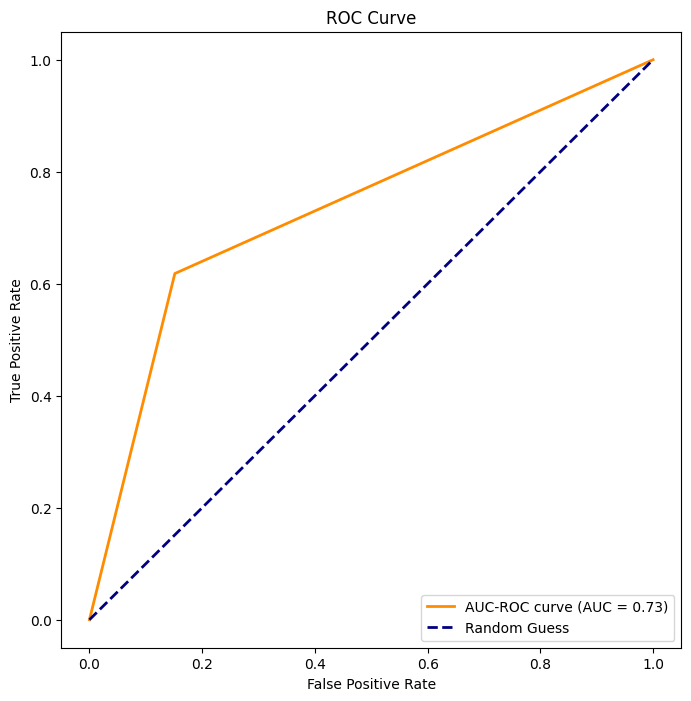

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Пример данных

X = data[["Glucose", "BMI"]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(learning_rate=0.001, num_iterations=2000)
model.fit(X_train,y_train)

# Предсказания
predictions = model.predict(X_test)

y_true = y_test
y_scores = predictions
# Получение значений для ROC-кривой
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Вычисление AUC-ROC
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC-ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


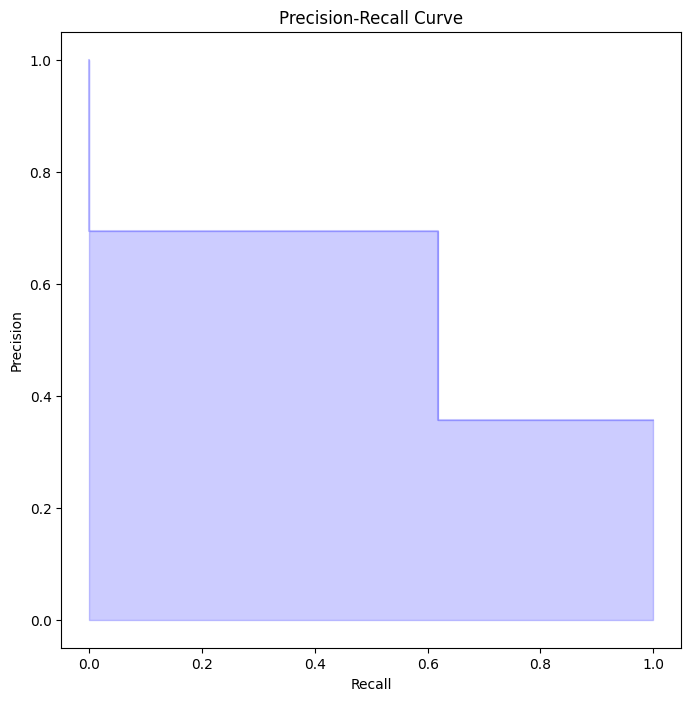

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Вычисление AUC-PR
pr_auc = auc(recall, precision)

# Визуализация Precision-Recall
plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.show()
